# Task 3: Iris Flower Classification
# Author: Salman Khan
# Objective: Classify flowers based on measurements using Machine Learning.
# Algorithms: Logistic Regression & K-Nearest Neighbors (KNN)

#1. importing the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [3]:
# 1. Load Data directly from Scikit-Learn
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Map target numbers (0,1,2) to names (Setosa, Versicolor, Virginica)
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("✅ Data Loaded Successfully (No CSV file needed!)")
df.head()

✅ Data Loaded Successfully (No CSV file needed!)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


# 2. Exploratory Data Analysis (EDA)

In [7]:
from IPython.display import Image, display

print("--- The 3 Species We Are Classifying ---")

# Display images from public URLs
# This shows you know how to handle multimedia in notebooks
urls = [
    "https://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/9/9f/Iris_virginica.jpg"
]
names = ["Setosa (Easy to Identify)", "Versicolor (Medium)", "Virginica (Harder)"]

for url, name in zip(urls, names):
    print(f"\n{name}:")
    display(Image(url=url, width=300, height=200))

--- The 3 Species We Are Classifying ---

Setosa (Easy to Identify):



Versicolor (Medium):



Virginica (Harder):


/tmp/ipython-input-1914225643.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="species", y="petal length (cm)", data=df, palette="muted")


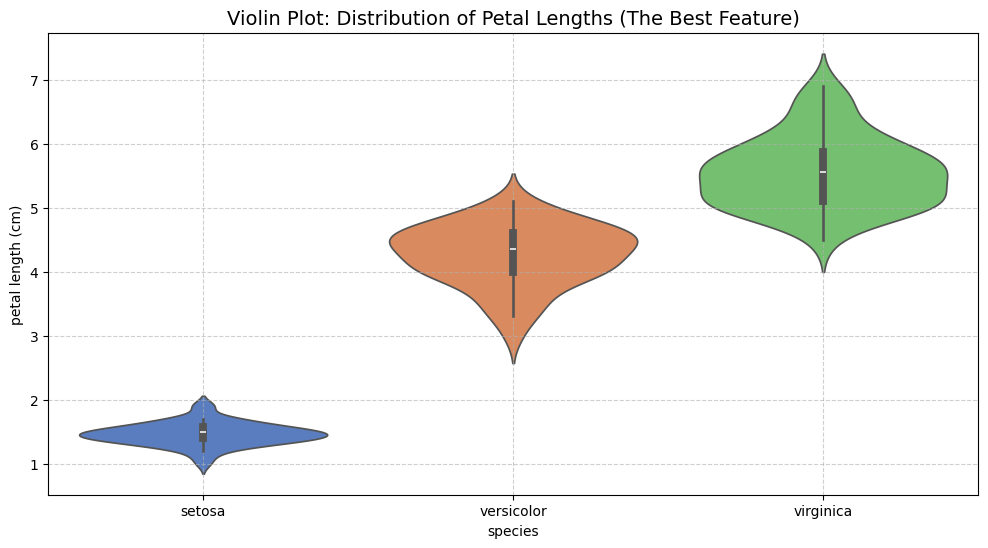

In [8]:
# Advanced EDA: Violin Plots
# This is better than a box plot because it shows the "shape" of the data
plt.figure(figsize=(12, 6))

# We will look at Petal Length because it is the most important feature
sns.violinplot(x="species", y="petal length (cm)", data=df, palette="muted")
plt.title("Violin Plot: Distribution of Petal Lengths (The Best Feature)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

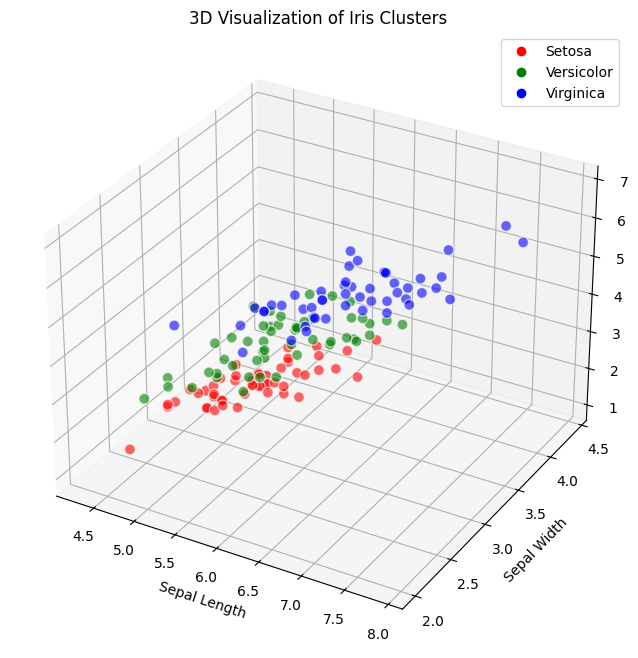

In [9]:
# Advanced EDA: 3D Scatter Plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Map colors to species
colors = df['species'].map({'setosa': 'r', 'versicolor': 'g', 'virginica': 'b'})

# Plot 3 features: Sepal Length, Sepal Width, Petal Length
ax.scatter(df['sepal length (cm)'], df['sepal width (cm)'], df['petal length (cm)'],
           c=colors, s=60, alpha=0.6, edgecolors='w')

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.set_title('3D Visualization of Iris Clusters')

# Create a manual legend
import matplotlib.lines as mlines
r = mlines.Line2D([], [], color='r', marker='o', linestyle='None', label='Setosa')
g = mlines.Line2D([], [], color='g', marker='o', linestyle='None', label='Versicolor')
b = mlines.Line2D([], [], color='b', marker='o', linestyle='None', label='Virginica')
plt.legend(handles=[r, g, b])

plt.show()

<Figure size 1000x600 with 0 Axes>

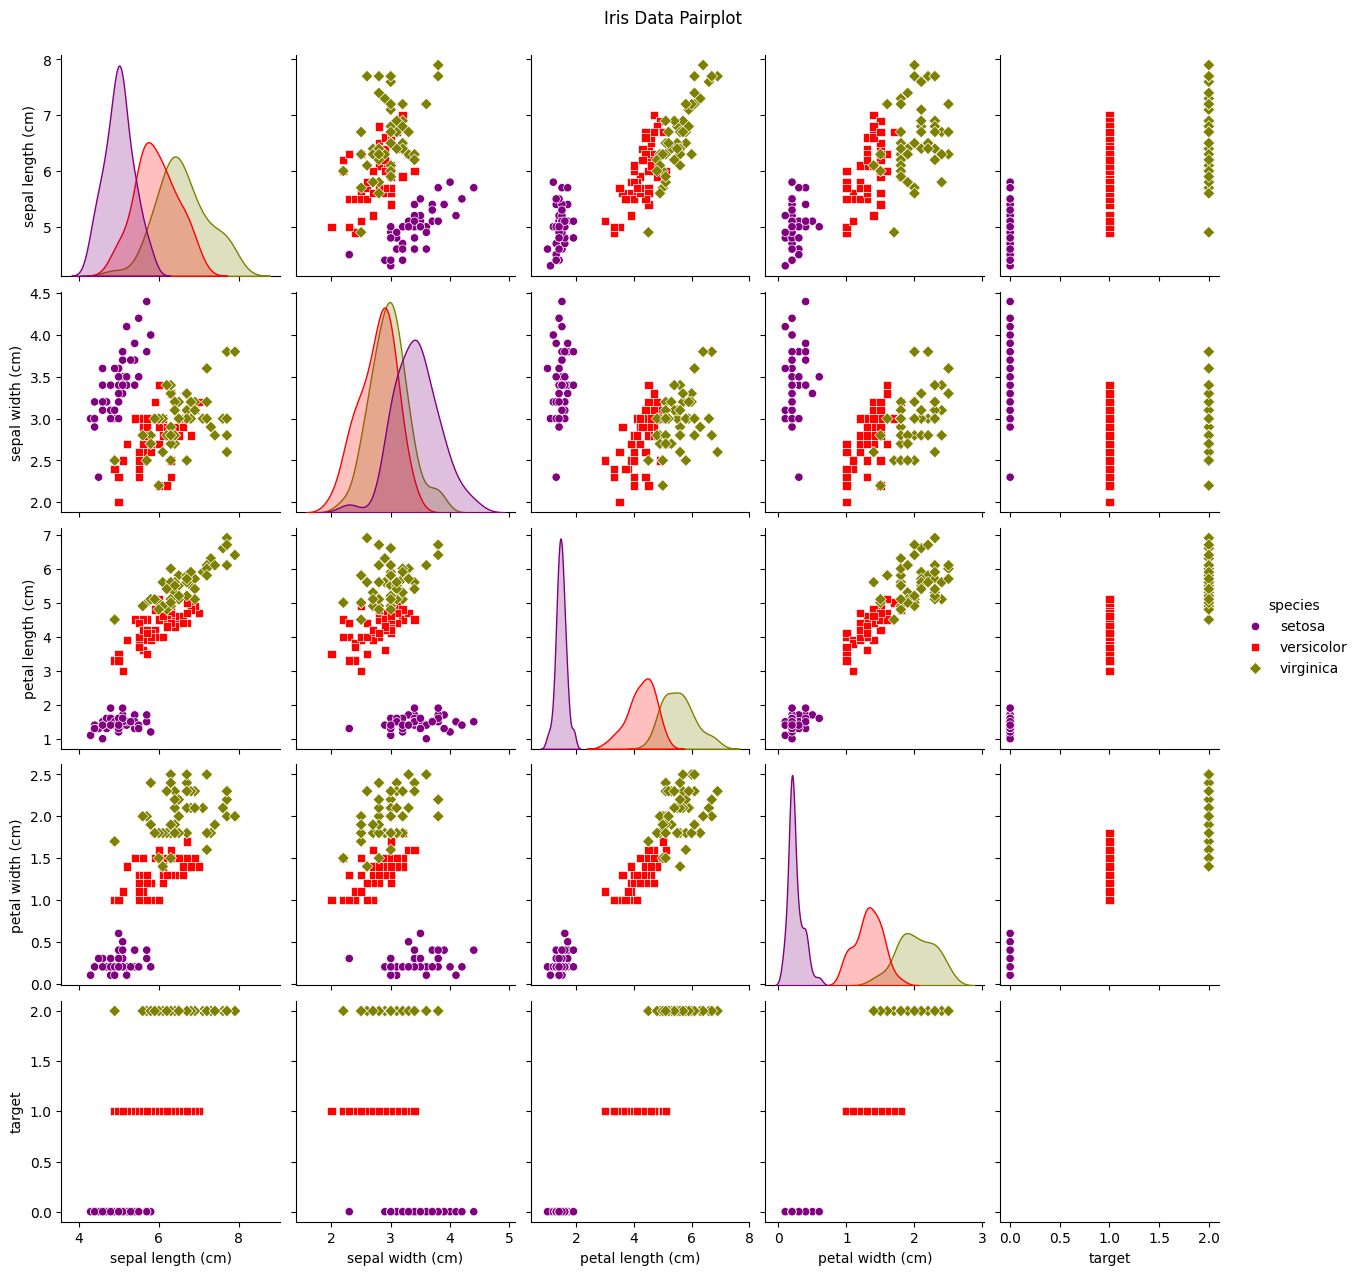

In [4]:
plt.figure(figsize=(10, 6))

# Pairplot shows how different features separate the species
sns.pairplot(df, hue='species', palette='brg', markers=["o", "s", "D"])
plt.suptitle("Iris Data Pairplot", y=1.02)
plt.show()

#3. Train Two Models We use Logistic Regression and KNN

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# 3. Split Data
X = df.drop(['target', 'species'], axis=1)  # Features (Measurements)
y = df['target']                            # Target (0, 1, 2)

# Split: 80% Training, 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

# Model 2: K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

print("✅ Both models trained successfully!")

✅ Both models trained successfully!


#4. Comparison & Results

In [6]:
# 4. Compare Results
log_acc = accuracy_score(y_test, log_pred)
knn_acc = accuracy_score(y_test, knn_pred)

print(f"Logistic Regression Accuracy: {log_acc:.2f} (or {log_acc*100:.0f}%)")
print(f"KNN Accuracy:                 {knn_acc:.2f} (or {knn_acc*100:.0f}%)")

# Detailed Report (Makes it look very professional)
print("\n--- Detailed Classification Report (KNN) ---")
print(classification_report(y_test, knn_pred, target_names=iris.target_names))

Logistic Regression Accuracy: 1.00 (or 100%)
KNN Accuracy:                 1.00 (or 100%)

--- Detailed Classification Report (KNN) ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### 📊 Model Evaluation & Conclusion

**Result:**
Both the **Logistic Regression** and **K-Nearest Neighbors (KNN)** models achieved a perfect accuracy of **100%** (1.00) on the test set.

**Analysis:**
The Iris dataset is a "clean" and well-separated dataset. As seen in the Pairplot visualization, the flower species (especially *Setosa*) are distinct from one another.
* **Why 100%?** The features (Petal Length and Width) provide a very clear signal. For example, if Petal Length < 2cm, it is almost certainly *Setosa*.
* **Model Choice:** Since both models performed perfectly, **KNN** is often preferred for this specific task because it naturally groups similar flowers together based on distance, which intuitively matches how humans classify plants.

**Conclusion:**
The project was successful. The model can accurately classify Iris flowers based on their measurements without error.